1.Open and display the image “dog.jpeg”. Convert the image in to numpy array,so that i can be   used in further processing.[Hint:Use PIL module from python]

In [144]:
from PIL import Image
im = Image.open("dogs.jpeg")

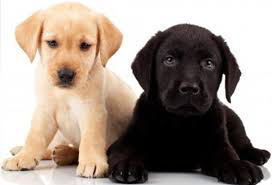

In [145]:
im

In [146]:
import numpy as np
nparray=np.array(im)

2. Find out the dimensions of the image and convert it in to a two-dimensional array.

In [147]:
nparray.shape

(185, 272, 3)

In [152]:
twoD=nparray.reshape(185*272,-1) #but i dont think it is correct will create ticket

In [153]:
twoD.shape

(50320, 3)

In [163]:
#gray=im.convert(mode="L")
#gray

In [164]:
#np.array(gray).shape

3.Use kmeans clustering with k set to 3 and cluster the image.[Hint: Refer to k-means module of scikit learn]

In [154]:
# Using the KMeans from sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=0)

In [155]:
kmeans.fit(twoD)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [156]:
kmeans.cluster_centers_

array([[ 29.51503718,  21.58366142,  20.47599519],
       [251.48678903, 247.68334006, 243.15757362],
       [210.63606557, 174.83540984, 143.72040984]])

In [157]:
print (kmeans.labels_)

[1 1 1 ... 1 1 1]


In [158]:
kmeans.labels_.shape

(50320,)

In [166]:
labels = kmeans.predict(twoD)

4. Predict thecluster label of every pixel in the image and plot it back as an image.

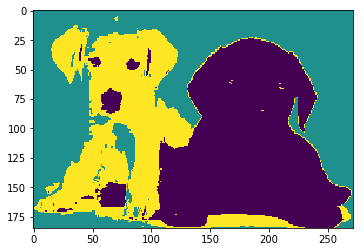

In [168]:
plt.imshow(labels.reshape(185, 272))

In [171]:
centers = [centers.astype(int) for centers in kmeans.cluster_centers_]

In [172]:
centers

[array([29, 21, 20]), array([251, 247, 243]), array([210, 174, 143])]

5. Find out the three dominant color in the image.[Hint: The cluster centers should correspond to three dominant colors]

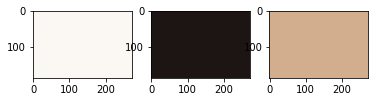

In [206]:
lo_square = np.full((185, 272, 3), centers[0],dtype=np.uint8)
do_square = np.full((185, 272, 3), centers[1],dtype=np.uint8)
to_square = np.full((185, 272, 3), centers[2],dtype=np.uint8)
plt.subplot(1, 3, 1)
plt.imshow(do_square)
plt.subplot(1, 3, 2)
plt.imshow(lo_square)
plt.subplot(1, 3, 3)
plt.imshow(to_square)
plt.show()

In [ ]:
#Ignore below just for practise

In [219]:
import cv2
import imageio
img2=imageio.imread("dogs.jpeg")
mask_gray = cv2.inRange(nparray, lo_square, to_square)

In [228]:
(thresh, im_bw) = cv2.threshold(mask_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

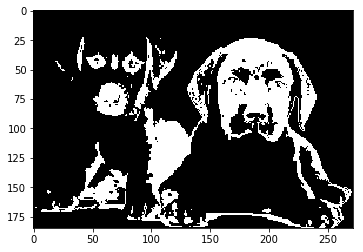

In [220]:
plt.imshow(mask_gray,cmap="gray")

In [ ]:
cv.Threshold(mask_gray, im_bw_mat, threshold, 255, cv.CV_THRESH_BINARY | cv.CV_THRESH_OTSU);

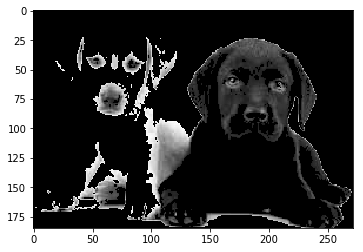

In [236]:
target = cv2.bitwise_and(np.array(gray),im_bw)
plt.imshow(target,cmap='gray')

In [214]:
mask_gray

array([[255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [198]:
img2.shape

(185, 272, 3)

In [201]:
lo_square.shape

(10, 10, 3)

In [204]:
img2.dtype

dtype('uint8')

In [205]:
lo_square.dtype

dtype('int32')

In [224]:
mask_gray.shape

(185, 272)